## **Universidade Federal do Ceará**
## **Departamento de Computação**
## **Disciplina: Métodos Numéricos**
## **Prof. Dr. João Paulo do Vale Madeiro**

## **Alunos:**
## **Pedro Leinos Falcão Cunha - 542114**
## **Gabriel Vasconcelos Fruet - 537618**
## **Kelvin Leandro Martins - 540006**

## 1) Um fluido é bombeado na rede de tubos mostrada na figura abaixo. No estado estacionário, os seguintes balanços de escoamento precisam ser satisfeitos:

$$
Q1 = Q2 + Q3
$$
$$
Q3 = Q4 + Q5
$$
$$
Q5 = Q6 + Q7
$$

## onde $Q_i$ é o escoamento no tubo $i$ (em $m^3/s$). Além disso, as quedas de pressão em torno dos três laços à direita devem ser nulas. A queda de pressão em cada seção de tubo circular pode ser calculada por:

$$
ΔP = \frac{16}{\pi^2} \cdot \frac{f \cdot L \cdot \rho}{2 \cdot D^5} \cdot Q^2
$$

##em que $∆P$ é a queda de pressão ($Pa$), $f$ é o fator de atrito (adimensional), $L$ é o comprimento do tubo (m), $ρ$ é a densidade do fluido ($kg/m^3$) e $D$ é o diâmetro do tubo ($m$).

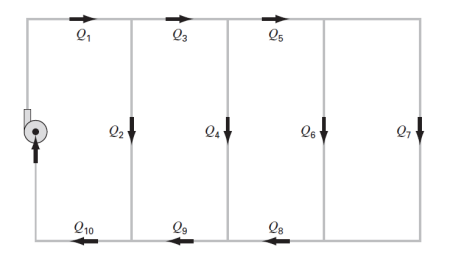

##Escreva um programa que lhe permita calcular o escoamento em todas as seções de tubo, dado que $Q_1 = 1m^3/s$ e $ρ = 1,23kg/m^3$. Todos os tubos têm $D = 500 mm$ e $f =0,005$. Os comprimentos dos tubos são $L_3 = L_5 = L_8 = L_9 = 2m$; $L_2 = L_4 = L_6 = 4m$; $L_7 = 8m.$

## **OBS: A entrega do trabalho computacional compreende um relatório detalhado da implementação e um código em Python.**

# *1º solução*

In [2]:
import numpy as np
import pandas as pd


# Ao final do código, Q[1] deve ser 1
# Define o dicionário L
L = {
    "L2": 4, "L4": 4, "L6": 4,
    "L3": 2, "L5": 2, "L8": 2, "L9": 2,
    "L7": 8, "L10": 8
}

# Inicializa a lista de Q's
Q = [0, 1, 2, 3, 4, 5, 6, 7, 0, 0, 0]

# Definição dos valores de Q
Q[7] = 1
Q[6] = np.sqrt(Q[7]**2 + Q[7]**2)
Q[5] = Q[6] + Q[7]
Q[4] = np.sqrt(Q[5]**2 + Q[6]**2)
Q[3] = Q[4] + Q[5]
Q[2] = np.sqrt(Q[3]**2 + Q[4]**2)
Q[1] = Q[2] + Q[3]

# Cria o DataFrame dos valores iniciais de Q
df_initial = pd.DataFrame({'Escoamento': Q[0:8]})

print("Valores iniciais de Q (m³/s):")
print(df_initial)

print("\n------------------------\n")

# Calcula o parametrizador
parameter = Q[1]

# Normaliza os valores
for i in range(len(Q)):
    Q[i] /= parameter

# Cria o DataFrame dos valores normalizados de Q
df_normalized = pd.DataFrame({'Escoamento': Q[0:8]})

print("Valores normalizados de Q (m³/s):")
print(df_normalized)

# Calcula os Q's restantes
Q[8] = Q[6] + Q[7]
Q[9] = Q[8] + Q[4]
Q[10] = Q[2] + Q[9]

print("\n------------------------\n")

# Cria o DataFrame dos valores finais de Q
df_final = pd.DataFrame({'Escoamento': Q})

print("Valores finais de Q (m³/s):")
print(df_final)

Valores iniciais de Q (m³/s):
   Escoamento
0    0.000000
1   11.127795
2    5.915648
3    5.212146
4    2.797933
5    2.414214
6    1.414214
7    1.000000

------------------------

Valores normalizados de Q (m³/s):
   Escoamento
0    0.000000
1    1.000000
2    0.531610
3    0.468390
4    0.251436
5    0.216953
6    0.127088
7    0.089865

------------------------

Valores finais de Q (m³/s):
    Escoamento
0     0.000000
1     1.000000
2     0.531610
3     0.468390
4     0.251436
5     0.216953
6     0.127088
7     0.089865
8     0.216953
9     0.468390
10    1.000000


# *2º solução*

In [16]:
import numpy as np
import pandas as pd

def find_interval(inicio, xmax, passo, f):
    refi = inicio

    while passo > 1e-4:
        final = inicio + passo

        if f(inicio) * f(final) < 0:
            return inicio, final

        inicio = final

        if final >= xmax:
            break

    inicio = refi
    passo /= 10

    return None

def solve(x):
    return 1 - (np.sqrt((np.sqrt((np.sqrt(x**2 + x**2) + x)**2 + np.sqrt(x**2 + x**2)**2)
    + (np.sqrt(x**2 + x**2) + x))**2 + np.sqrt((np.sqrt(x**2 + x**2) + x)**2 + np.sqrt(x**2 + x**2)**2)**2)
    + (np.sqrt((np.sqrt(x**2 + x**2) + x)**2 + np.sqrt(x**2 + x**2)**2) + (np.sqrt(x**2 + x**2) + x)))

def secant_method(f, x0, x1, e=1e-10, maxiter=100):
    i = 1
    error = 1e6

    while i <= maxiter and error > e:
        xr = x0 - f(x0) / ((f(x0) - f(x1)) / (x0 - x1))
        error = abs(xr - x0) / abs(x0)

        x1 = x0
        x0 = xr
        i += 1

    return xr

# Define o dicionário L
L = {
    "L2": 4, "L4": 4, "L6": 4,
    "L3": 2, "L5": 2, "L8": 2, "L9": 2,
    "L7": 8, "L10": 8
}

# Inicializa a lista de Q's
Q = [0, 1, 2, 3, 4, 5, 6, 7, 0, 0, 0]

# Definição do intervalo pra encontrar a raiz
interval = find_interval(0, 0.1, 0.001, solve)

# Definição dos valores de Q baseado na raiz da função utilizando o método da secante
Q[7] = secant_method(solve, interval[0], interval[1])
Q[6] = np.sqrt(Q[7]**2 + Q[7]**2)
Q[5] = Q[6] + Q[7]
Q[4] = np.sqrt(Q[5]**2 + Q[6]**2)
Q[3] = Q[4] + Q[5]
Q[2] = np.sqrt(Q[3]**2 + Q[4]**2)
Q[1] = Q[2] + Q[3]

# Calcula os Q's restantes
Q[8] = Q[6] + Q[7]
Q[9] = Q[8] + Q[4]
Q[10] = Q[2] + Q[9]

# Cria o DataFrame dos valores finais de Q
df_final = pd.DataFrame({'Escoamento': Q})

print("Valores de Q (m³/s):")
print(df_final)

Valores de Q (m³/s):
    Escoamento
0     0.000000
1     1.000000
2     0.531610
3     0.468390
4     0.251436
5     0.216953
6     0.127088
7     0.089865
8     0.216953
9     0.468390
10    1.000000
